<a href="https://colab.research.google.com/github/JamshedAli18/-Natural-Language-Processing-NLP-/blob/main/MarvelWord2Vec/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [ ]:
import gensim
import os

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []

for filename in os.listdir():
    if not filename.endswith('.txt'):
        continue
    # try UTF-8, else Latin‑1
    try:
        with open(filename, encoding='utf-8') as f:
            text = f.read()
    except UnicodeDecodeError:
        with open(filename, encoding='latin-1') as f:
            text = f.read()

    for sent in sent_tokenize(text):
        story.append(simple_preprocess(sent))

print(len(story), "sentences tokenized.")


32399 sentences tokenized.


In [ ]:
story[10]

['no', 'billy']

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [ ]:
model.build_vocab(story)

In [ ]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(600190, 840015)

In [ ]:
model.wv.most_similar('thor')

[('everybody', 0.9990172982215881),
 ('suit', 0.9988207817077637),
 ('set', 0.9985859990119934),
 ('though', 0.9985769987106323),
 ('loki', 0.998510479927063),
 ('next', 0.9984918236732483),
 ('men', 0.9984900951385498),
 ('rogers', 0.9984825253486633),
 ('barton', 0.9984573125839233),
 ('everyone', 0.9984075427055359)]

In [ ]:
model.wv.doesnt_match(['ironman', 'hulk', 'thor', 'vision', 'pepper'])


'pepper'

In [ ]:
model.wv.most_similar('wanda', topn=10)


[('bruce', 0.9982285499572754),
 ('yondu', 0.9982010126113892),
 ('play', 0.9981082081794739),
 ('tonight', 0.9980559945106506),
 ('rogers', 0.9980476498603821),
 ('killing', 0.9980384707450867),
 ('hard', 0.9980033040046692),
 ('moving', 0.9979766011238098),
 ('means', 0.997974157333374),
 ('enough', 0.9979566335678101)]

In [ ]:
model.wv.similarity('thor', 'jane')  # likely high



0.9970241

In [ ]:
model.wv.doesnt_match(['thor', 'hulk', 'loki', 'blackwidow'])
# Likely "loki" – others are Avengers.


'hulk'

In [ ]:
#  "Who is like Ironman and Thor, but not like Loki?
model.wv.most_similar(positive=['iron', 'thor'], negative=['loki'])


[('ant', 0.9918373227119446),
 ('portuguese', 0.991354763507843),
 ('speaking', 0.9913343787193298),
 ('grunting', 0.9908621311187744),
 ('spider', 0.9905620813369751),
 ('groans', 0.9894945025444031),
 ('powering', 0.9893730282783508),
 ('grunts', 0.9893592596054077),
 ('old', 0.9892765879631042),
 ('hot', 0.9889804124832153)]

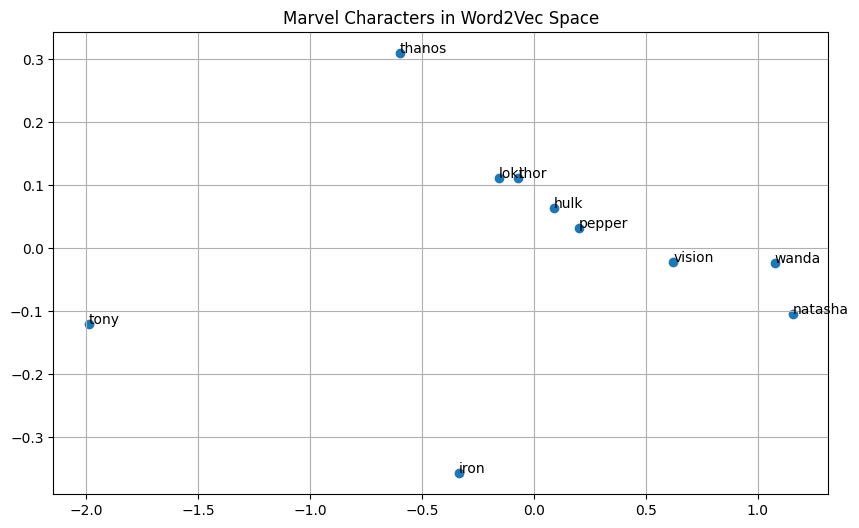

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ['iron', 'tony', 'pepper', 'thor', 'loki', 'hulk', 'thanos', 'vision', 'wanda', 'natasha']
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(10, 6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Marvel Characters in Word2Vec Space')
plt.grid(True)
plt.show()
